In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 81
dx = .25
dt = .0002
gamma = 1.4
t = 0.01
nt = int(t/dt)+1

x = np.linspace(-10, 10, nx)

In [3]:
def initial_condition(nx):
    """
    Define the initial conditions of left side and right side
    """
    
    IC = np.zeros((nx,3))
    IC[:int((nx-1)/2),0] = 1
    IC[int((nx-1)/2):,0] = 0.125
    IC[:int((nx-1)/2),2] = 100e3
    IC[int((nx-1)/2):,2] = 10e3
    
    return IC

In [4]:
def computeU(nx):
    """
    Return the array of vector of initial variable U
    """
    
    IC = initial_condition(nx)
    
    # the initial condition for rho
    rho_0 = IC[:,0]
    
    # the initial condition for u
    u_0 = IC[:,1]
    
    # the initial condition for p
    p_0 = IC[:,2]
    
    return np.array([rho_0,
                     rho_0*u_0,
                     rho_0*e_T(rho_0,p_0,u_0)])

In [5]:
def computeF(U):
    """
    Return the array of flux vector F
    """
    
    U1 = U[0]
    U2 = U[1]
    U3 = U[2]
    
    return np.array([U2,
                     U2**2/U1 + (gamma-1)*(U3 - 0.5*U2**2/U1),
                    (U3 + (gamma-1)*(U3 - 0.5*U2**2/U1))*(U2/U1)])

In [6]:
def e_T(rho, p, u):
    """
    Define the function of specific total energy
    """
    
    return p/((gamma-1)*rho) + 0.5*u**2

In [7]:
def richtmyer(U, nx, dx, nt, dt):
    """
    Using the Richtmyer method to calculate the Sod's Shock Tube problem
    """
    
    U_n = np.zeros((3,nt,nx))
    for t in range(0,nt):
        U_n[:,t,:] = U[:,:].copy()
    
    # Set the temporary variable
    U_plus = np.zeros((3,nx))
    U_plus = U_n[:,0,:].copy()
    F_plus = np.zeros((3,nx))
    
    for t in range(1,nt):
        # first-step
        F_plus = computeF(U)
        U_plus[:,:-1] = 0.5*(U[:,1:] + U[:,:-1]) - dt/(2*dx)*(F_plus[:,1:] - F_plus[:,:-1])
        # second-step
        F = computeF(U_plus)
        U_n[:,t,1:-1] = U[:,1:-1] - dt/dx*(F[:,1:-1] - F[:,:-2])
        U = U_n[:,t,:].copy()
        
    return U_n     

In [8]:
U = computeU(nx)
U_n = richtmyer(U, nx, dx, nt, dt)

rho = U_n[0,int(t/dt),:]

u = U_n[1,int(t/dt),:]/U_n[0,int(t/dt),:]

p = (gamma - 1)*(U_n[2,int(t/dt),:] - 0.5*U_n[1,int(t/dt),:]**2/U_n[0,int(t/dt),:])


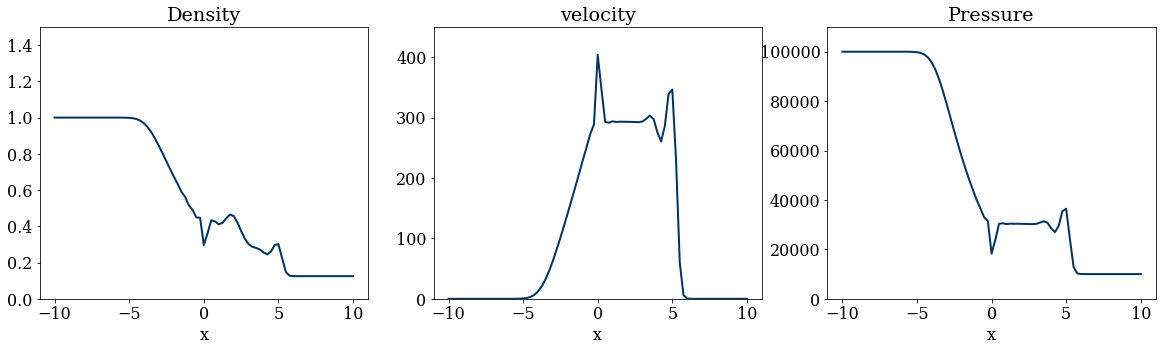

In [9]:
# plot the result
pyplot.figure(figsize=(20,5))
pyplot.subplot(131)
pyplot.plot(x, rho, color='#003366', ls='-', lw=2)
pyplot.title('Density')
pyplot.xlabel('x')
pyplot.ylim(0,1.5);

pyplot.subplot(132)
pyplot.plot(x, u, color='#003366', ls='-', lw=2)
pyplot.title('velocity')
pyplot.xlabel('x')
pyplot.ylim(0,450);

pyplot.subplot(133)
pyplot.plot(x, p, color='#003366', ls='-', lw=2)
pyplot.title('Pressure')
pyplot.xlabel('x')
pyplot.ylim(0,11e4);

In [10]:
# Define the position required by the question
position = int(np.where(x==2.5)[0])
position

50

In [11]:
# First question
u[position]

292.61147152682651

In [12]:
# Second question
p[position]

30250.89016757203

In [13]:
# Third question
rho[position]

0.3746914026476012